# Проверка гипотез для увеличения выручки интернет-магазина

**Описание проекта**
<p> Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Часть 1. Приоритизация гипотез**
<p> В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задачи части 1**

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.
    
    
**Часть 2. Анализ A/B-теста**
<p> Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
    
**Задачи части 2**
<p> Проанализировать A/B-тест:
    
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его. 
    
Исходя из следущих возможных вариантов решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.


**Описание данных**

Файл /datasets/hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ

Файл /datasets/visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Общая информация о таблицах

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

<div class="alert alert-block" style="background-color: gainsboro">
<g>

<p>Откроем таблицу и изучим общую информацию о данных.
<p>Считаем данные из csv-файлов в датафреймы и сохраним в переменные.
<p>Выведем общую информацию о таблицах, чтобы понять с каким типом данных будем работать в каждом столбце методом info().

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

print(hypothesis.info())
print('___________________________________')
print(hypothesis.isna().sum().sort_values(ascending=False))
print('___________________________________')
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
___________________________________
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
___________________________________


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
orders = pd.read_csv('/datasets/orders.csv')

print(orders.info())
print('___________________________________')
print(orders.isna().sum().sort_values(ascending=False))
print('___________________________________')
pd.set_option('display.max_columns', None)
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
___________________________________
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
___________________________________


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [4]:
orders['date'] = pd.to_datetime(orders['date'])

In [5]:
#посчитаем количество уникальных пользователей в датафрейме orders
unique_visitorId = len(orders['visitorId'].unique())
print(
    f"Всего {unique_visitorId} уникальных пользователей ")

#выберем visitorId по каждой группе
visitorsA = set(orders[(orders['group'] == 'A')]['visitorId'])
visitorsB = set(orders[(orders['group'] == 'B')]['visitorId'])

#проверим входят ли данные из одного множества в другое
visitors_in = visitorsA.intersection(visitorsB)
print(f"Количество пользователей, которые попали в разные группы = {len(visitors_in)}")
      
#посчитаем какой % пользователей попал в разные группы
print(f"Процент совпадений {round(len(visitors_in)/len(orders['visitorId'].unique()) * 100, 2)} %")

Всего 1031 уникальных пользователей 
Количество пользователей, которые попали в разные группы = 58
Процент совпадений 5.63 %


Не рискну удалить такой высокий % пользователей, необходимо обратиться к тому, кто делал данную выгрузку для предотвращения таких ситуаций в дальнейшем.

In [6]:
visitors = pd.read_csv('/datasets/visitors.csv')

print(visitors.info())
print('___________________________________')
print(visitors.isna().sum().sort_values(ascending=False))
print('___________________________________')
pd.set_option('display.max_columns', None)
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
___________________________________
date        0
group       0
visitors    0
dtype: int64
___________________________________


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [7]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [8]:
print(visitors.duplicated().sum())
print('___________________________________')
print(orders.duplicated().sum())

0
___________________________________
0


<div class="alert alert-block" style="background-color: gainsboro">
<g> В таблицах orders и visitors есть общие столбцы: date — дата и group — группа A/B-теста.
<p> Дубликатов и пропущенных значений в таблицах нет. </g>
</div>

## Часть 1. Приоритизация гипотез

- В компании принята шкала линейной оценки гипотезы по параметру Reach от 0 до 10, где 0 — «охват гипотезы ни на кого не повлияет», а 10 — «гипотеза охватит хотя бы половину пользователей».

- Параметр Impact показывает, насколько сильно изменение повлияет на охваченных пользователей. Impact измеряют по-разному:
По доле от общей площади экрана, которую составят меняющиеся элементы, в %;
По степени изменения пользовательского опыта;
По предварительной оценке важности для пользователей;
По количеству новых пользователей, которых изменение поможет привлечь.
В зависимости от продукта и стратегии вашего бизнеса можно принять для оценки Impact и собственные, уникальные критерии.

- Параметр Confidence показывает, насколько вы уверены в оценках других параметров. Уверенность, например, будет высокой, если:
вы можете точно посчитать, сколько пользователей подвержено изменению;
у вас есть доказательства, что данное изменение повлияет с тем Impact, который вы оценили (например, за счёт предыдущего опыта или кейсов конкурентов);
у вас есть точная оценка трудозатрат, и рисков их увеличения нет, либо они низкие.

- Параметр Efforts показывает, насколько сложно проверить гипотезу. В большинстве компаний на рынке разработка очень дорогая и выступает основным ресурсом. Если проверка гипотезы не требует разработки, её Efforts значительно снижается.

### Применение фреймворка ICE

Задача:
Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета

In [9]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 1)
pd.set_option('max_colwidth', 200)
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


<div class="alert alert-block" style="background-color: gainsboro">
<g> По модели ICE приоритетными оказались гипотезы с номерами 8, 0, 7, 6, 2.
<p> Наименее приоритетные гипотезы: 4,3,5
<p> Приоритетность гипотезы пропорциональна показателям Impact и/или Confidence или их сопокупности.

</div>

### Применение фреймворка RICE

Задача:
Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета

In [10]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


<div class="alert alert-block" style="background-color: gainsboro">
<g> По модели RICE приоритетными оказались гипотезы с номерами 7, 2, 0, 6, 8.
<p> Наименее приоритетные гипотезы: 4,1,5
    
Приоритетность гипотезы пропорциональна показателю Reach.

На первых трех местах по приоритетности и в той и в другой модели есть совпадающие гипотезы - 0 и 7, их стоит проверять в первую очередь, а 4 и 5 в последнюю.
</div>

## Часть 2. Анализ A/B-теста

### График кумулятивной выручки по группам

Приведем код из теоретической части спринта, адаптированный под решение текущего проекта

In [11]:
#оформим в отдельный датафрейм datesGroups уникальные значения дат и групп
datesGroups = (
    orders[["date", "group"]].drop_duplicates().sort_values(by=["date", "group"])
)

#выведем кумулятивные показатели из orders
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(x["date"] >= orders["date"], x["group"] == orders["group"])
    ].agg(
        {
            "date": "max",
            "group": "max",
            "transactionId": "nunique",
            "visitorId": "nunique",
            "revenue": "sum",
        }
    ),
    axis=1,
)
ordersAggregated.columns = ["date", "group", "orders", "buyers", "revenue"]


#выведем кумулятивные показатели из visitors
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(x["date"] >= visitors["date"], x["group"] == visitors["group"])
    ].agg({"date": "max", "group": "max", "visitors": "sum"}),
    axis=1,
)

# сводим все накопительные данные в датафрейм cummulativeData
cummulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=["date", "group"], right_on=["date", "group"]
)


print(
    "\n Таблица с кумулятивными (накопленными) значениями по дате и группам:"
    "\n- кол-во покупок (orders) \n- кол-во покупателей (buyers) \n- выручка (revenue) \n- кол-во посетителей (visitors)"
)
cummulativeData.head(5)


 Таблица с кумулятивными (накопленными) значениями по дате и группам:
- кол-во покупок (orders) 
- кол-во покупателей (buyers) 
- выручка (revenue) 
- кол-во посетителей (visitors)


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [12]:
min_date = cummulativeData['date'].min()
max_date = cummulativeData['date'].max()
min_date = datesGroups['date'].min()
max_date = datesGroups['date'].max()

print("Минимальная дата в cummulativeData:", min_date.date())
print("Минимальная дата в datesGroups:", min_date.date())
print("Максимальная дата в cummulativeData:", max_date.date())
print("Максимальная дата в datesGroups:", max_date.date())

Минимальная дата в cummulativeData: 2019-08-01
Минимальная дата в datesGroups: 2019-08-01
Максимальная дата в cummulativeData: 2019-08-31
Максимальная дата в datesGroups: 2019-08-31


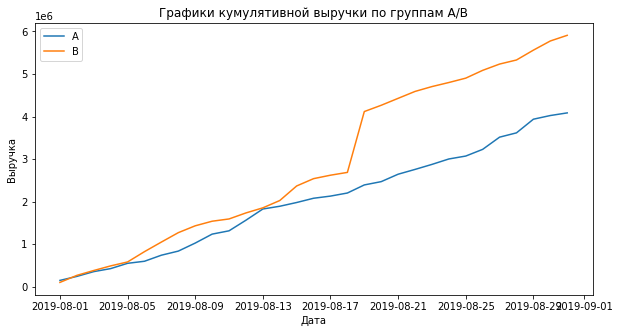

In [13]:
#выделим из таблицы cummulativeData отдельные датафреймы с данными по столбцу group
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

#построим график прибыли по дням по разным группам
plt.figure(figsize=(10,5))
plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue'], label = 'A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue'], label = 'B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend()
plt.show()

<div class="alert alert-block" style="background-color: gainsboro">
<g> В группе В прибыль растет быстрее группы А на протяжении всего периода.
    Резкий скачок в прибыли наблюдается с 17 августа 2021 - возможно было большое количество заказалов или присуствовали аномально большие  (по сумме) заказы, что требует более детального анализа в дальнейшем.
</div>

### График кумулятивного среднего чека по группам

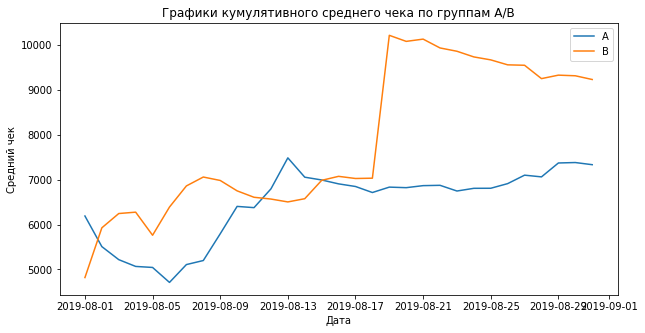

In [14]:
#построим график среднего чека по дням по разным группам

plt.figure(figsize=(10,5))
plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue']/cummulativeDataA['orders'], label = 'A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue']/cummulativeDataB['orders'], label = 'B')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

<div class="alert alert-block" style="background-color: gainsboro">
<g> В группе А заметно падение в начале анализа, затем рост и выходом на плато. Более половины исследуемого периода показатель кумулятивного среднего чека - практически не изменялся, показывал медленную на положительную динамику.
    
<p> Для группы В - в первую половину периода наблюдался неравномерный рост, а во второй половине произошел резкий всплеск. Это делает более вероятным предположение из пункта выше. Затем средний чек падает, но оставется на довольно высоком уровне.

<p> Накопление среднего чека в обоих группах неравномерное. 

</div>

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [15]:
#объединим ранее созданные датафреймы по дате
#применим suffixes для добавления суффиксов к колонкам, 
#которые имеют одинаковое имя в обоих объединяемых наборах данных 

mergedCummulativeData = cummulativeDataA.merge(
    cummulativeDataB, left_on="date", right_on="date", suffixes=["A", "B"]
)

mergedCummulativeData.head(5)

,date,groupA,ordersA,buyersA,revenueA,visitorsA,groupB,ordersB,buyersB,revenueB,visitorsB
0,2019-08-01,A,24,20,148579,719,B,21,20,101217,713
1,2019-08-02,A,44,38,242401,1338,B,45,43,266748,1294
2,2019-08-03,A,68,62,354874,1845,B,61,59,380996,1803
3,2019-08-04,A,84,77,425699,2562,B,78,75,489567,2573
4,2019-08-05,A,109,100,549917,3318,B,101,98,581995,3280


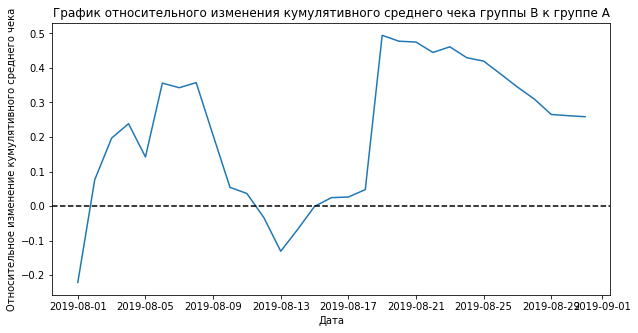

In [16]:
#построим график относительного изменения кумулятивного среднего чека группы B к группе A

plt.figure(figsize=(10, 5))
plt.plot(
    mergedCummulativeData["date"],
    (
        (mergedCummulativeData["revenueB"] / mergedCummulativeData["ordersB"])
        / (mergedCummulativeData["revenueA"] / mergedCummulativeData["ordersA"])
        - 1
    ),
)

#отметим пунктирную горизонтальную линию пока на 0
plt.axhline(y=0, color="black", linestyle="--")
plt.title(
    "График относительного изменения кумулятивного среднего чека группы B к группе A"
)
plt.xlabel("Дата")
plt.ylabel("Относительное изменение кумулятивного среднего чека")
plt.show()

<div class="alert alert-block" style="background-color: gainsboro">
<g> Колебания между показателями групп довольно резкие, от -0,2 до +0,5 за несколько дней, скорее всего в данных есть аномальные значения

</div>

### График кумулятивного среднего количества заказов на посетителя по группам

In [17]:
#добавим столбцы с кумулятивнвм средним количеством заказов на посетителя по группам в датафрейм mergedCummulativeData
mergedCummulativeData['conversionA'] =  mergedCummulativeData['ordersA'] / mergedCummulativeData['visitorsA'] 
mergedCummulativeData['conversionB'] =  mergedCummulativeData['ordersB'] / mergedCummulativeData['visitorsB']
mergedCummulativeData[['conversionA','conversionB']].head(5)

,conversionA,conversionB
0,0.033380,0.029453
1,0.032885,0.034776
2,0.036856,0.033833
3,0.032787,0.030315
4,0.032851,0.030793


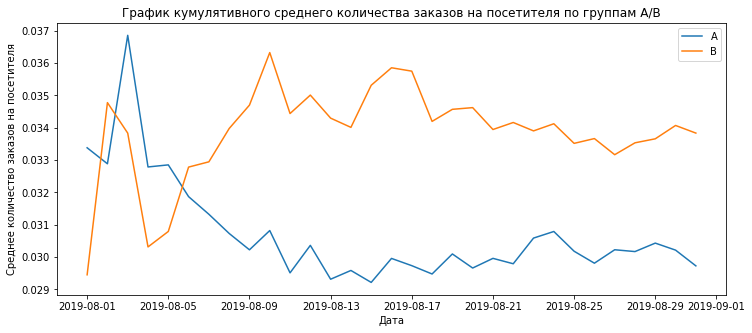

In [18]:
#построим график кумулятивного среднего количества заказов на посетителя по группам

plt.figure(figsize=(12,5))
plt.plot(mergedCummulativeData['date'], mergedCummulativeData['conversionA'], label='A')
plt.plot(mergedCummulativeData['date'], mergedCummulativeData['conversionB'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам A/B')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.show()

<div class="alert alert-block" style="background-color: gainsboro">
<g> В первую неделю в обеих группах наблюдались резкие скачки показателя кумулятивного среднего количества заказов на посетителя. С 09 августа 2019 г обе группы показывают более стабильные результаты, при этом в группе В стабильно выше эта метрика относительно группы А.
</div>

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

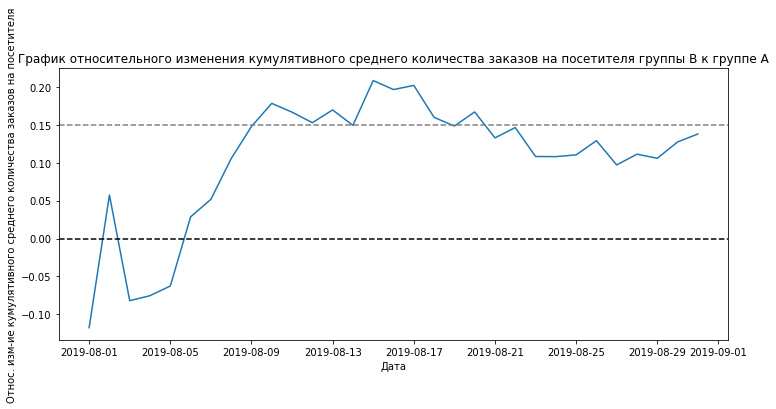

In [19]:
#построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

plt.figure(figsize=(12,5))
plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['conversionB']/mergedCummulativeData['conversionA'])-1))
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

#отметим пунктирные горизонтальные линии на 0 и 0.1
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.ylabel('Относ. изм-ие кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.show()

<div class="alert alert-block" style="background-color: gainsboro">
<g> Метрика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A лучше в группе В практически на всем периоде, кроме первой недели. К концу периода заметно снижение роста и выход на плато на уровне 0.15
</div>

### Определение аномальных значений

#### Точечный график количества заказов по пользователям

По графикам выше мы сделали предположение о вероятном наличии аномальных значений в выборке.
Проведем исследование для подтверждения нашего предположения, проанализируем сколько в среднем пользователи оформляют заказов.

In [20]:
#создадим отдельный датафрейм группирующий количество заказов на пользователя
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.head(5)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


In [21]:
ordersByUsers1 = round((ordersByUsers['orders'].value_counts()*100/ordersByUsers['orders'].sum()),1).sort_values(ascending=False).head(15)
ordersByUsers1

1     78.3
2      5.3
3      1.4
5      0.5
4      0.3
11     0.2
8      0.1
9      0.1
Name: orders, dtype: float64

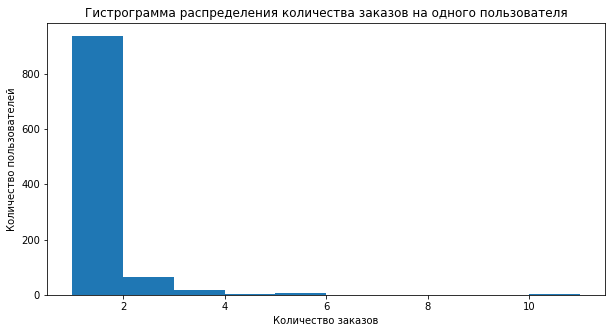

In [22]:
#построим гистрограмму для более однозначного вывода
plt.figure(figsize=(10,5))
plt.hist(ordersByUsers['orders'], bins = 10)
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.show()

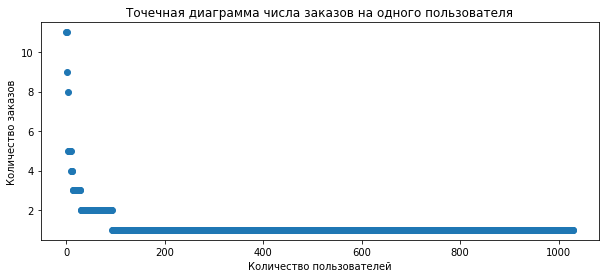

In [23]:
#построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

<div class="alert alert-block" style="background-color: gainsboro">
<g> Оба графика отражают, что большинство пользователей совершают 1 заказ - 78.3%, 5.3% пользователей совершают всего 2 заказа.
</div>

#### Определение 95-ого и 99-ого перцентиля количества заказов на пользователя. Определение границы для определения аномальных пользователей.

In [24]:
#определим процентили оператором percentile
percentiles_or = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles_or[0],percentiles_or[1]))

Перцентили:
95: 2.0
99: 4.0


<div class="alert alert-block" style="background-color: gainsboro">
<g> Больше 2-х заказов приходится на 5% пользователей. Более 4-х заказов на 1% пользователей. Для анализа будем опираться на данные 95-ого перцентиля.
</div>

#### Точечный график стоимостей заказов

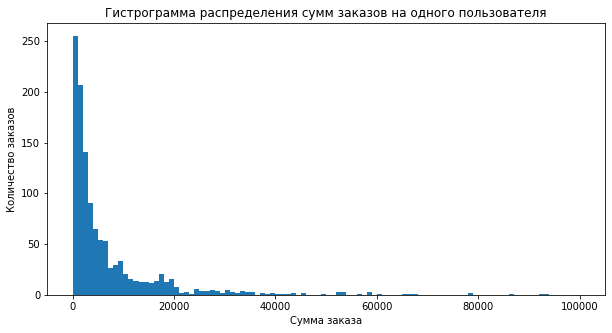

In [25]:
#построим гистраграмму для более наглядного определения стоимости заказов
plt.figure(figsize=(10,5))
plt.hist(orders['revenue'], range=(0,100001), bins = 100)
plt.xlabel('Сумма заказа')
plt.ylabel('Количество заказов')
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.show()

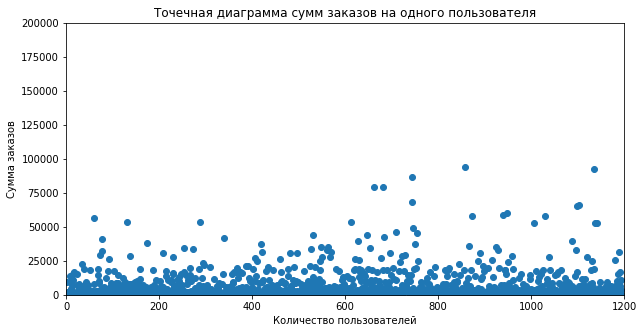

In [26]:
#построим точечную диаграмму

#определим границы построения графика = значениям из столбца с выручкой
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей')
plt.ylabel('Сумма заказов')
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.axis([0, 1200, 0, 200000])
plt.show()

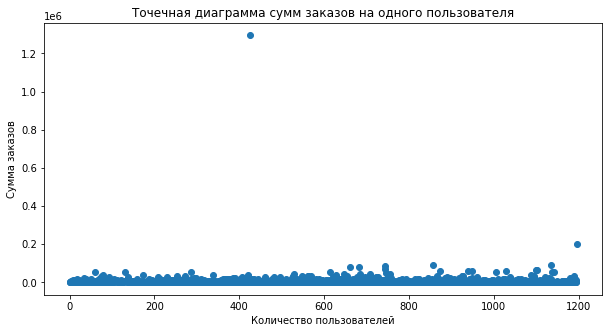

In [27]:
#построим точечную диаграмму

#определим границы построения графика = значениям из столбца с выручкой
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей')
plt.ylabel('Сумма заказов')
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.show()

<div class="alert alert-block" style="background-color: gainsboro">
<g> По графикам можно сделать предположение, что больша часть пользователей оформляет заказы на сумму до 25 000
</div>

#### Определение 95-ого и 99-ого перцентиля сумм заказов на пользователя. Определение границы для выявления аномальных пользователей.

In [28]:
# определим перцентили

percentiles_rev = np.percentile(orders['revenue'], [95, 99])
percentiles_rev  = np.round(percentiles_rev).astype(int) # округляем до целых чисел
print('Перцентили:\n95: {}\n99: {}'.format(percentiles_rev[0],percentiles_rev[1]))

Перцентили:
95: 28000
99: 58233


<div class="alert alert-block" style="background-color: gainsboro">
<g> Около 95% пользователей совершают покупки стоимостью менее 28000. А заказы свыше 58233 совершает менее 1% пользоваталей. Для анализа возьмем данные по 95-ому перцентилю.
</div>

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами

#### по «сырым» данным

Нулевая гипотеза H0: различий нет в среднем количестве заказов на посетителя между группами по "сырым" данным = различия статистически не значимы.
<p>  H1: различия есть в среднем количестве заказов на посетителя между группами по "сырым" данным = различия статистически значимы.
<p>  Для расчета значимости будем использовать критерий Манна-Уитни, т.к. не можем быть уверены в том, что данные в A/B-тесте из нормального распределения, при котором мы ранее использовали критерий Стьюдента в других проектах.
<p> Для определения значимости возьмем стандартное значение alpha = 0.05

In [29]:
# создадим отдельные датафреймы с данными го заказах для групп А и В
ordersByUsersA = (
    orders[orders["group"] == "A"]
    .groupby("visitorId", as_index=False)
    .agg({"transactionId": "nunique"})
)
ordersByUsersA.columns = ["visitorId", "orders"]

ordersByUsersA.head()

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [30]:
ordersByUsersB = (
    orders[orders["group"] == "B"]
    .groupby("visitorId", as_index=False)
    .agg({"transactionId": "nunique"})
)
ordersByUsersB.columns = ["visitorId", "orders"]
ordersByUsersB.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [31]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(cummulativeDataA['visitors'].sum() - len(ordersByUsersA['orders'])),
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(cummulativeDataB['visitors'].sum() - len(ordersByUsersB['orders'])),
                               name='orders')],axis=0)

alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в кумулятивного среднего количества заказов на посетителя между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в кумулятивном среднем количестве заказов на посетителя между группами нет".')

print("Относительный прирост кумулятивного среднего количества заказов на посетителя группы B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-значение: 0.015
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в кумулятивного среднего количества заказов на посетителя между группами нет".
Относительный прирост кумулятивного среднего количества заказов на посетителя группы B: 0.144


<div class="alert alert-block" style="background-color: gainsboro">
<g> p-value = 0.015, это менее заданной статистичекой значимости, значит что мы можем отвергнуть нулевую гипотезу и сделать вывод, что разницав кумулятивном среднем количестве заказов на посетителя между группами есть.

Относительный прирост группы В по среднему количеству заказов на посетителя составил 14.4%.
</div>

#### по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28000 рублей,(по 95ому перцентилю) создав без них отдельный датафрейм abnormalUsers

In [32]:
#создаем датафрейм с пользователями без заказов больше 95 перцентиля
usersWithManyOrders = ordersByUsers[ordersByUsers['orders'] > percentiles_or[0]]['visitorId']                                                                                                 
                                                                                                   
#создаем датафрейм с пользователями без заказов дороже 95 перцентиля
usersWithExpensiveOrders = orders[orders['revenue'] > percentiles_rev[0]]['visitorId']

#объединяем в единый датафрейм с 'очищенными данными' уникальных пользователей
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
                 .drop_duplicates()
                 .reset_index(drop=True))

print(abnormalUsers.head(5))
len(abnormalUsers)

0    4256040402
1    2458001652
2    2378935119
3    2038680547
4     199603092
Name: visitorId, dtype: int64


83

Нулевая гипотеза H0: различий нет в среднем количестве заказов на посетителя между группами по "очищенным" данным = различия статистически не значимы.
<p>  H1: различия есть в среднем количестве заказов на посетителя между группами по "очищенным" данным = различия статистически значимы.
<p>  Для расчета значимости будем использовать критерий Манна-Уитни, т.к. не можем быть уверены в том, что данные в A/B-тесте из нормального распределения, при котором мы ранее использовали критерий Стьюдента в других проектах.
<p> Для определения значимости возьмем стандартное значение alpha = 0.05

In [33]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(cummulativeDataA['visitors'].sum() - len(ordersByUsersA['orders'])),
               name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(cummulativeDataB['visitors'].sum() - len(ordersByUsersB['orders'])),
               name='orders')],axis=0)

alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в кумулятивном среднем количестве заказов на посетителя между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в кумулятивном среднем количестве заказов на посетителя между группами нет".')

print("Относительный прирост в кумулятивном среднем количестве заказов на посетителя группы B: {0:.3f}"
      .format(sampleBFiltered.mean()/sampleAFiltered.mean() - 1))

p-значение: 0.011
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в кумулятивном среднем количестве заказов на посетителя между группами нет".
Относительный прирост в кумулятивном среднем количестве заказов на посетителя группы B: 0.181


<div class="alert alert-block" style="background-color: gainsboro">
<g> По сырым данным p-value = 0.015, по очищенным = 0,011, и так и другая величина менее заданной статистичекой значимости, значит что мы можем отвергнуть нулевую гипотезу и сделать вывод, что разница в в кумулятивном среднем количестве заказов на посетителя между группами есть.

Относительный прирост группы В по среднему количеству заказов на посетителя по сырым данным составил 14.4%, по очищенным 18.1%
</div>

### Расчет статистической значимости различий в среднем чеке заказа между группами

#### по «сырым» данным

Нулевая гипотеза H0: различий нет в среднем чеке между группами по "сырым" данным = различия статистически не значимы.
<p>  H1: различия есть в среднем чеке между группами по "сырым" данным = различия статистически значимы.
<p>  Для расчета значимости будем использовать критерий Манна-Уитни.
<p> Для определения значимости возьмем стандартное значение alpha = 0.05


In [34]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Относительное изменение среднего чека в группе B по отношению группы A: 0.259


In [35]:
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-value= {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По сырым данным разница в средних чеках в группах A и B статистически значима')
else:
    print('По сырым данным разница в средних чеках в группах A и B статистически не значима')

p-value= 0.7292909855432458
По сырым данным разница в средних чеках в группах A и B статистически не значима


<div class="alert alert-block" style="background-color: gainsboro">
<g> p-value = 0.73.Не получилось отвергнуть нулевую гипотезу. Различие в среднем чеке между группами по "сырым" данным статистически не значимы.
Относительный прирост группы В по среднему чеку заказа составил 25,9%.
</div>

#### по «очищенным» данным

Нулевая гипотеза H0: различий нет в среднем чеке между группами по "очищенным" данным = различия статистически не значимы.
<p>  H1: различия есть в среднем чеке между группами по "очищенным" данным = различия статистически значимы.
<p>  Для расчета значимости будем использовать критерий Манна-Уитни.
<p> Для определения значимости возьмем стандартное значение alpha = 0.05

In [36]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('p-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным разница в средних чеках в группах A и B статистически значима')
else:
    print('По очищенным данным разница в средних чеках в группах A и B статистически не значима')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.022
p-value: 0.7528652023825759
По очищенным данным разница в средних чеках в группах A и B статистически не значима


<div class="alert alert-block" style="background-color: gainsboro">
<g> По сырым данным p-value = 0.73, по очищенным = 0,75. И в том и в другом случае получилось отвергнуть нулевую гипотезу. Различие в среднем чеке между группами статистически не значимы.

Относительный прирост группы В по среднему чеку по сырым данным составил 25,9%, по очищенным 2,2%.
</div>

### Вывод к части 2

- По сырым данным p-value = 0.015, по очищенным - 0,011 ->  разница в кумулятивном среднем количестве заказов на посетителя между группами есть и является статистически значимой. Относительный прирост группы В по среднему количеству заказов на посетителя по сырым данным составил 14.4%, по очищенным 18.1%
Что позволяет сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать более успешными результаты группы B.

- Различие в среднем чеке между группами статистически не значимы. По сырым данным p-value = 0.73, по очищенным = 0,84. Относительный прирост группы В по среднему чеку по сырым данным составил 25,9%, по очищенным 5,5%.
Можно сделать вывод, что изменения повлекут за собой увеличение в кумулятивном среднем количестве заказов на посетителя, но над увеличением среднего чека стоит поработать отдельно и раздаработать другие мероприятия, которые в дальнейшем также протестировать.